# Excercise 8.1 Create a Training, Test and Validation set

## 8.1.1 Use the scikitlearn method to split the data

### 8.1.1.1 Load the dataset

In [55]:
import pandas as pd

In [56]:
filename = r"../Material/bimsim_31_day_sample.csv"
#filename = r"..\Material\07092021bimsim_room.csv"
%time data = pd.read_csv(filename, sep=",")

CPU times: total: 328 ms
Wall time: 346 ms


In [57]:
%time data["datetime"] = pd.to_datetime(data["datetime"],format='%a, %d %b %Y %H:%M:%S %Z') 
#%time data["datetime"] = pd.to_datetime(data["datetime"],format='%Y-%m-%d %H:%M:%S.%f') 

CPU times: total: 3.16 s
Wall time: 3.18 s


In [58]:
data.head()

,Unnamed: 0,source,datetime,id,celsius,pressure,humidity,sensor,room
0,0,0013A20041A94FA3,2021-08-18 09:40:38+00:00,1.629272e+09,23.144531,956.7491,42.368893,0013A20041A94FA3,H205
1,1,0013A20041A94FA3,2021-08-18 09:45:42+00:00,1.629273e+09,23.154882,956.8015,42.059960,0013A20041A94FA3,H205
2,2,0013A20041A94FA3,2021-08-18 09:50:45+00:00,1.629273e+09,23.165040,956.7753,42.528866,0013A20041A94FA3,H205
3,3,0013A20041A94FA3,2021-08-18 09:55:48+00:00,1.629273e+09,23.165040,956.7753,42.512318,0013A20041A94FA3,H205
4,4,0013A20041A94FA3,2021-08-18 10:00:52+00:00,1.629274e+09,23.180664,956.8277,42.291660,0013A20041A94FA3,H205


##### Drop unused columns

In [59]:
data = data.drop(["Unnamed: 0", "source", "sensor", "id"], axis=1)

In [60]:
data = data[data["celsius"] > 0]

In [61]:
data.describe()

,celsius,pressure,humidity
count,130864.000000,130864.000000,130864.000000
mean,24.813373,952.055172,42.196907
std,1.684586,6.733915,3.486678
min,19.825780,933.167240,24.105137
25%,23.662304,946.650300,40.049740
50%,24.673046,952.876200,42.136738
75%,25.885742,956.721070,44.467346
max,34.465820,971.139900,57.478916


In [62]:
data.room.unique()

array(['H205', 'H113', 'H206', 'H211', 'H210', 'H220', 'H108', 'H110',
       'H106', 'across_from_H207_on_railing', 'H208', 'H109', 'H213',
       'H111', 'H207', 'H218', 'H212', 'H216_desk_at_window', 'H217',
       'H215', 'H209', 'H216', 'H214', 'H203'], dtype=object)

In [63]:
data.room.value_counts()

room
H215                           7844
H207                           7817
H218                           7724
H203                           7703
H214                           7702
H113                           7678
H216                           7649
H211                           7585
H213                           7577
H212                           7563
H110                           7545
H208                           7489
H206                           7473
H217                           7419
H216_desk_at_window            4579
H106                           2219
H111                           2192
H210                           2192
H205                           2179
H108                           2170
H209                           2163
H109                           2160
across_from_H207_on_railing    2127
H220                           2115
Name: count, dtype: int64

### 8.1.1.2 Split the dataset until you have the needed subsets
* Consider the size of the data, what portion would you need for each subset?
* Does the data require shuffeling?

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
data = data.dropna()

In [66]:
data.room.unique()

array(['H205', 'H113', 'H206', 'H211', 'H210', 'H220', 'H108', 'H110',
       'H106', 'across_from_H207_on_railing', 'H208', 'H109', 'H213',
       'H111', 'H207', 'H218', 'H212', 'H216_desk_at_window', 'H217',
       'H215', 'H209', 'H216', 'H214', 'H203'], dtype=object)

In [67]:
Xy_train, Xy_test = train_test_split(data, test_size=0.7, random_state=42, shuffle=True, stratify=data["room"])

In [68]:
Xy_test, Xy_valid = train_test_split(Xy_test, test_size=0.1, random_state=42, shuffle=True, stratify=Xy_test["room"])

In [69]:
display(Xy_train.shape, Xy_test.shape, Xy_valid.shape)

(39259, 5)

(82444, 5)

(9161, 5)

### 8.1.2 Alternate approach: Create a K-Fold CV set

In [70]:
from sklearn.model_selection import StratifiedKFold

Split off the test set first.

In [71]:
Xy_train, Xy_test = train_test_split(data, test_size=0.8, random_state=42, shuffle=True, stratify=data["room"])
display(Xy_train.shape, Xy_test.shape)

(26172, 5)

(104692, 5)

In [72]:
strat_kFold = StratifiedKFold(n_splits=2)

In [73]:
Xy_train_kf = Xy_train.reset_index()

In [74]:
for trainIdx, testIdx in strat_kFold.split(Xy_train_kf[["datetime", "celsius", "pressure", "humidity"]], Xy_train_kf["room"]):
    print("TRAIN:", trainIdx, "TEST:", testIdx)
    Xy_train, Xy_test = Xy_train_kf.iloc[trainIdx], Xy_train_kf.iloc[testIdx]

TRAIN: [12008 12016 12043 ... 26169 26170 26171] TEST: [    0     1     2 ... 13943 13947 13951]
TRAIN: [    0     1     2 ... 13943 13947 13951] TEST: [12008 12016 12043 ... 26169 26170 26171]


In [75]:
Xy_train

,index,datetime,celsius,pressure,humidity,room
0,54404,2021-08-01 04:58:59+00:00,24.583593,945.40170,41.124416,H213
1,78645,2021-07-28 08:57:53+00:00,25.290430,945.63275,42.098350,H212
2,43576,2021-07-28 00:29:34+00:00,25.808008,946.89880,42.608130,H208
3,80121,2021-08-03 15:42:04+00:00,24.924610,947.90607,42.784176,H212
4,116996,2021-08-01 07:36:07+00:00,25.476954,944.69420,39.634670,H214
...,...,...,...,...,...,...
13919,118347,2021-08-07 01:23:02+00:00,24.650976,942.39825,40.728000,H214
13942,120674,2021-08-15 05:15:47+00:00,26.186329,950.00910,41.196465,H214
13943,119444,2021-08-10 21:41:26+00:00,25.248829,952.40875,39.768566,H214
13947,116544,2021-07-30 17:31:16+00:00,28.198437,937.34230,36.140360,H214


### 8.1.3 Check, if your distributions are ok

We need to check, if we have the same distribution for the rooms in train and validation set
General approach: If the sampling is truely stratified, the rooms must be distributed similarly in both samplings. Hence, we can compare the histograms and/or perfom an ks-test.

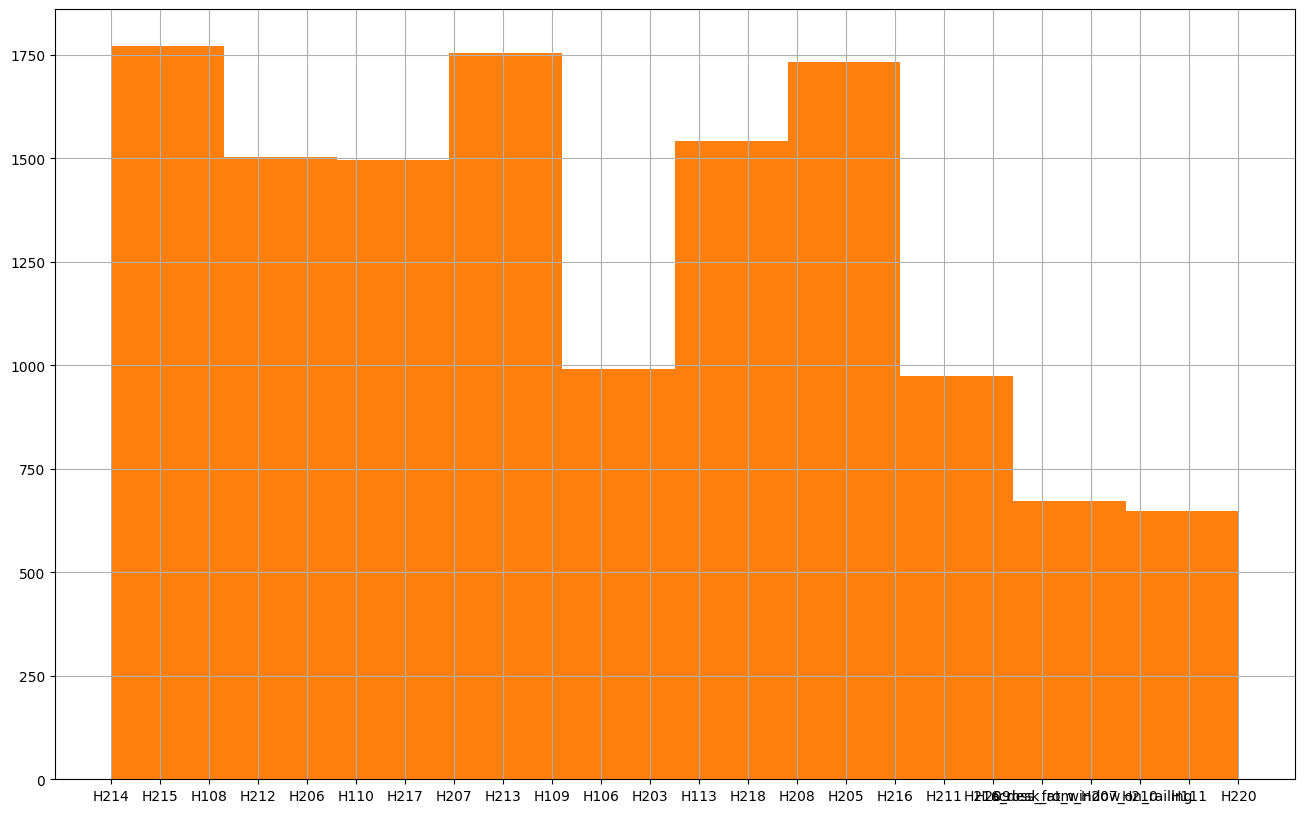

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,10))
h_valid = Xy_valid["room"].hist()
h_train = Xy_train["room"].hist()

The shapes look similar, but as they are scaled differently, it is not too easy to say if they match w.r.t. their distribution

In [77]:
h_train = Xy_train.groupby("room")["room"].count()

In [78]:
h_valid = Xy_valid.groupby("room")["room"].count()

#### Alternative: Build the normalized differences between the values

In [79]:
delta = h_train/h_train.sum() - h_valid/h_valid.sum()
delta

room
H106                           0.000045
H108                          -0.000009
H109                           0.000023
H110                           0.000060
H111                           0.000034
H113                          -0.000039
H203                           0.000005
H205                          -0.000042
H206                          -0.000006
H207                          -0.000028
H208                           0.000038
H209                           0.000023
H210                           0.000034
H211                          -0.000039
H212                          -0.000082
H213                          -0.000039
H214                           0.000005
H215                           0.000060
H216                          -0.000049
H216_desk_at_window           -0.000041
H217                           0.000049
H218                           0.000016
H220                          -0.000031
across_from_H207_on_railing    0.000012
Name: room, dtype: float64

We see, that the normalized differences are all close to zero, indicating that the distributions are close to equal

#### Alternative: Check the distributinos using a ks-test

In [80]:
from scipy.stats import ks_2samp
from sklearn.preprocessing import minmax_scale

display(ks_2samp(minmax_scale(h_train), minmax_scale(h_valid)))

KstestResult(statistic=0.08333333333333333, pvalue=0.9999994797375902, statistic_location=0.9529616724738676, statistic_sign=1)

From the ks-Test we see, that with D<0.1 and p>99.999% the two samplings have identical distributions, which is, what we wanted to get

# Excercise 8.2 - Clustering

Using the training set perform the following tasks
1. Split into X, y, where y is the room number (can be later used for predictions) and X is time, celsius, presssure are humidity
   * Think about scaling the data
   * Thinks about which portions of the timestamp are required
   * Create appropriate encodings
2. perform a k-Means clustering and compute the silhoutte score, try out several values for the number of clusters
3. same as 2 but use DBScan as cluster algorithm, try out several values for the number of clusters

## 8.2.1 Data Split

### 8.2.1.1 Splitting the data in X and y

In [81]:
X = Xy_train.iloc[:, :-1]
y = Xy_train.iloc[:, -1]
y.unique().shape

(24,)

In [82]:
X.describe()

,index,celsius,pressure,humidity
count,13086.000000,13086.000000,13086.000000,13086.000000
mean,65427.968287,24.809822,952.070821,42.195067
std,37772.390283,1.680460,6.713501,3.478357
min,40.000000,19.857030,933.245700,26.939514
25%,32737.500000,23.658594,946.691125,40.044068
50%,65299.500000,24.668457,952.872560,42.098735
75%,98177.000000,25.897558,956.697400,44.465431
max,130857.000000,33.385742,971.139900,55.565968


In [83]:
import numpy as np
from math import cos, sin, pi

X = X[["datetime", "celsius", "pressure", "humidity"]]
X["mod"] = X["datetime"].dt.hour*60+X["datetime"].dt.minute
X["mod_sin"] = X["mod"].map(lambda x : sin(2.*pi*x/1440.))
X["mod_cos"] = X["mod"].map(lambda x : cos(2.*pi*x/1440.))

In [84]:
X.describe()

,celsius,pressure,humidity,mod,mod_sin,mod_cos
count,13086.000000,13086.000000,13086.000000,13086.000000,13086.000000,13086.000000
mean,24.809822,952.070821,42.195067,718.548296,0.001603,-0.001007
std,1.680460,6.713501,3.478357,415.821136,0.706912,0.707353
min,19.857030,933.245700,26.939514,0.000000,-1.000000,-1.000000
25%,23.658594,946.691125,40.044068,359.000000,-0.704015,-0.710185
50%,24.668457,952.872560,42.098735,716.000000,0.008727,-0.010908
75%,25.897558,956.697400,44.465431,1074.000000,0.710185,0.704015
max,33.385742,971.139900,55.565968,1439.000000,1.000000,1.000000


In [85]:
from sklearn.preprocessing import StandardScaler
z_trafo = StandardScaler()
colNames = ['celsius', 'pressure', 'humidity', 'mod_sin', 'mod_cos']
X_scaled = pd.DataFrame(z_trafo.fit_transform(X[colNames]), columns=colNames)
X_scaled

,celsius,pressure,humidity,mod_sin,mod_cos
0,-0.134628,-0.993427,-0.307815,1.360940,0.379239
1,0.286009,-0.959010,-0.027806,1.011055,-0.985095
2,0.594019,-0.770420,0.118757,0.176261,1.403896
3,0.068310,-0.620378,0.169371,-1.168124,-0.799347
4,0.397009,-1.098816,-0.736122,1.290087,-0.573610
...,...,...,...,...,...
13081,-0.094529,-1.440819,-0.421786,0.498934,1.323495
13082,0.819157,-0.307112,-0.287101,1.385208,0.277238
13083,0.261252,0.050338,-0.697626,-0.808617,1.163048
13084,2.016558,-2.193950,-1.740747,-1.405614,-0.176993


## 8.2.1 k-Means Clustering

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [105]:
parameters = {'n_clusters':[2, 5, 10, 25, 50, 75]}
scores = {}
#parameters = {'n_clusters':[50]}
for i in parameters["n_clusters"]:
    print(i)
    clusterer = KMeans(n_clusters=i, n_init="auto")
    %time clusterer.fit(X_scaled)
    score = silhouette_score(X_scaled, clusterer.labels_, metric="euclidean")
    scores[i] = score

2
CPU times: total: 0 ns
Wall time: 12 ms
5
CPU times: total: 172 ms
Wall time: 34 ms
10
CPU times: total: 125 ms
Wall time: 23 ms
25
CPU times: total: 250 ms
Wall time: 55 ms
50
CPU times: total: 500 ms
Wall time: 100 ms
75
CPU times: total: 562 ms
Wall time: 149 ms


In [106]:
scores

{2: 0.26420651011830326,
 5: 0.24119840297631837,
 10: 0.2177776482087448,
 25: 0.19421183721015098,
 50: 0.19380030086039632,
 75: 0.19992363560764098}

In [109]:
clusterer.labels_

array([36, 40, 30, ..., 57, 49, 74])

In [89]:
z_trafo.scale_

array([1.68039546, 6.71324445, 3.47822436, 0.70688476, 0.7073262 ])

In [90]:
z_trafo.mean_

array([ 2.48098220e+01,  9.52070821e+02,  4.21950669e+01,  1.60251557e-03,
       -1.00729232e-03])

In [110]:
centers = KMeans(n_clusters = 10, n_init="auto").fit(X_scaled).cluster_centers_
display(centers*z_trafo.scale_ + z_trafo.mean_)

array([[ 2.30690537e+01,  9.59322031e+02,  4.63144608e+01,
        -1.71836273e-01,  8.22007411e-01],
       [ 2.47942816e+01,  9.53550238e+02,  4.17274377e+01,
        -1.72069675e-01,  8.82218503e-01],
       [ 2.58416664e+01,  9.46826255e+02,  3.99888826e+01,
         5.84209450e-02, -8.81001707e-01],
       [ 2.23801177e+01,  9.61244183e+02,  4.79631805e+01,
         4.98553126e-01, -5.06985605e-01],
       [ 2.49433083e+01,  9.46066135e+02,  4.18208007e+01,
         8.04516087e-01,  2.88663847e-01],
       [ 2.35425781e+01,  9.56329399e+02,  4.40068006e+01,
         8.72069230e-01,  2.92643292e-01],
       [ 2.76580636e+01,  9.45785607e+02,  3.67555139e+01,
        -7.82247534e-01, -3.59824637e-01],
       [ 2.41882798e+01,  9.55457564e+02,  4.27062506e+01,
         3.97970350e-01, -8.19269415e-01],
       [ 2.61128270e+01,  9.45290271e+02,  4.01392103e+01,
        -6.19439949e-01,  5.97921977e-01],
       [ 2.46262202e+01,  9.55057924e+02,  4.29126448e+01,
        -8.26161323e-01

In [92]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def plot_clusters(clusterer, n_clusters, cluster_labels, silhouette_avg, X):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

C:\Els\Anaconda3_202303\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2203231109331436


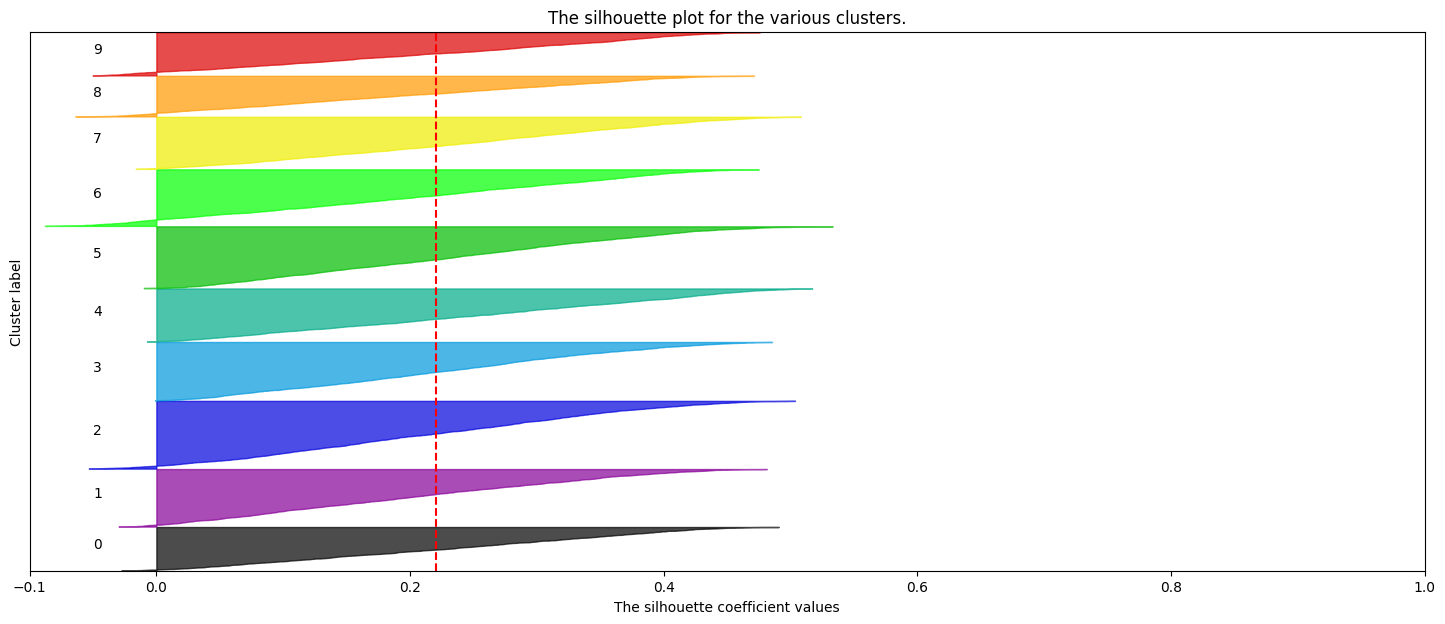

In [93]:
clusterer = KMeans(n_clusters = 10)
cluster_labels = clusterer.fit_predict(X_scaled)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(silhouette_avg)
plot_clusters(clusterer, clusterer.cluster_centers_.shape[0], cluster_labels, silhouette_avg, X_scaled)

In [94]:
cluster_labels.shape

(13086,)

The shapes are dropping quickly indicating that clustering is not very well.

# 8.2.2 DBSCAN

In [95]:
from sklearn.cluster import DBSCAN


In [96]:
# this effectively creates a GridSearch for clustering
dbscan_parameters = {'eps':[0.75, 1, 1.25], 'min_samples':[2, 3, 4]}
dbscan_scores = {}
for i in dbscan_parameters["eps"]:
    for j in dbscan_parameters['min_samples']:
        print(i, j)
        dbscan_clusterer = DBSCAN(eps=i, min_samples=j, n_jobs=-1)
        %time res = dbscan_clusterer.fit(X_scaled)
        print(set(dbscan_clusterer.labels_), len(set(dbscan_clusterer.labels_)))
        # genertate the s-score without the noise (-1) label
        score = silhouette_score(X_scaled[dbscan_clusterer.labels_!=-1], dbscan_clusterer.labels_[dbscan_clusterer.labels_!=-1], metric="euclidean")
        #score = silhouette_score(X_scaled, dbscan_clusterer.labels_, metric="euclidean")
        dbscan_scores["eps:"+str(i) + " " + "min_samples:" + str(j)] = score

0.75 2
CPU times: total: 1.58 s
Wall time: 321 ms
{0, 1, 2, 3, 4, 5, 6, 7, 8, -1} 10
0.75 3
CPU times: total: 1.86 s
Wall time: 332 ms
{0, 1, 2, 3, 4, 5, 6, 7, -1} 9
0.75 4
CPU times: total: 1.8 s
Wall time: 327 ms
{0, 1, 2, 3, 4, -1} 6
1 2
CPU times: total: 2.98 s
Wall time: 522 ms
{0, 1, 2, 3, -1} 5
1 3
CPU times: total: 2.12 s
Wall time: 368 ms
{0, 1, 2, 3, -1} 5
1 4
CPU times: total: 2.91 s
Wall time: 474 ms
{0, 1, 2, -1} 4
1.25 2
CPU times: total: 4.33 s
Wall time: 705 ms
{0, 1, -1} 3
1.25 3
CPU times: total: 4.45 s
Wall time: 723 ms
{0, 1, -1} 3
1.25 4
CPU times: total: 4.39 s
Wall time: 723 ms
{0, 1, -1} 3


In [97]:
dbscan_scores

{'eps:0.75 min_samples:2': 0.07127392610191528,
 'eps:0.75 min_samples:3': 0.07223837595320126,
 'eps:0.75 min_samples:4': 0.14962886845262954,
 'eps:1 min_samples:2': 0.3660711848795078,
 'eps:1 min_samples:3': 0.3660711848795078,
 'eps:1 min_samples:4': 0.5200114784511032,
 'eps:1.25 min_samples:2': 0.555827037496062,
 'eps:1.25 min_samples:3': 0.555827037496062,
 'eps:1.25 min_samples:4': 0.555827037496062}

In [98]:
def getBestParameterSet(scores):
    return list(scores.keys())[np.array(list(scores.values())).argmax()]

In [99]:
display(getBestParameterSet(dbscan_scores))

'eps:1.25 min_samples:2'

CPU times: total: 1.33 s
Wall time: 306 ms


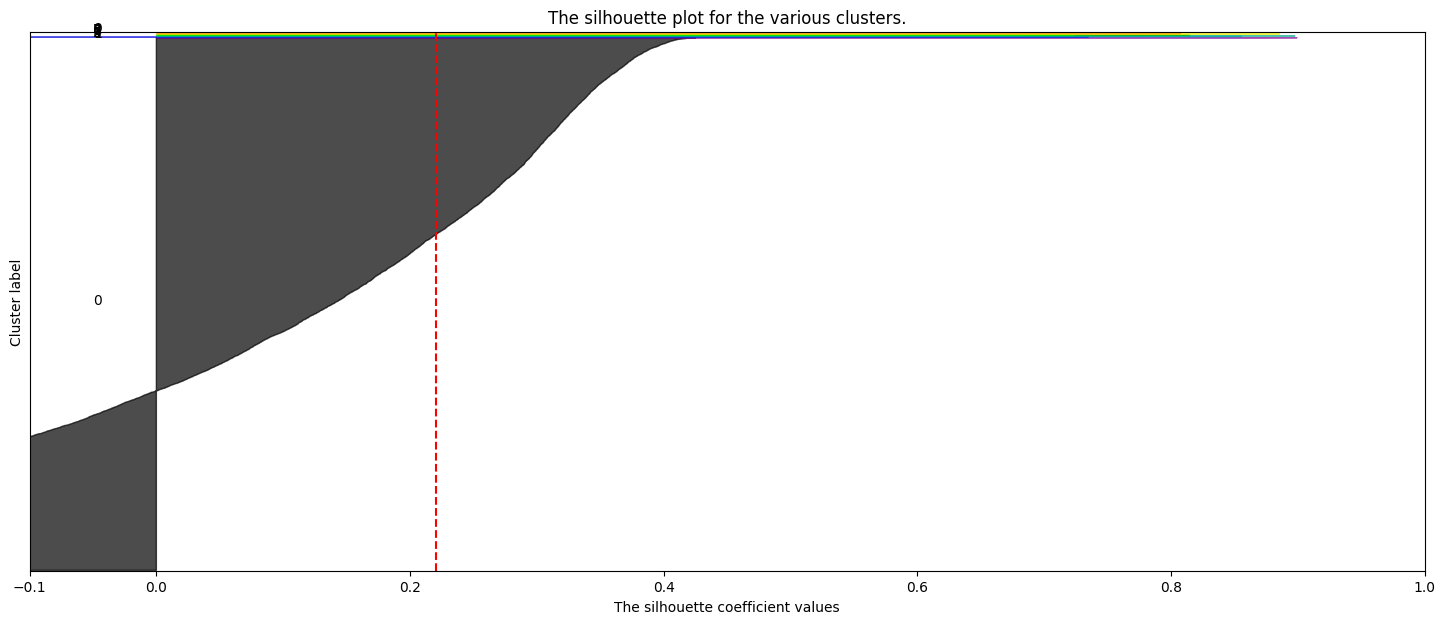

In [100]:
dbscan_clusterer = DBSCAN(eps=0.75, min_samples=2, n_jobs=-1)
%time res = dbscan_clusterer.fit(X_scaled)
plot_clusters(dbscan_clusterer, np.unique(dbscan_clusterer.labels_).shape[0], dbscan_clusterer.labels_, silhouette_avg, X_scaled)

In [101]:
np.unique(dbscan_clusterer.labels_).shape[0]

10

# 8.2.3 Conclusions

With Silhouette scores being very low, we can conclude, that the data is not clusterable with the given algorithms. One potential reason might be, that the values are more dependent from the time of the year than the time of the day

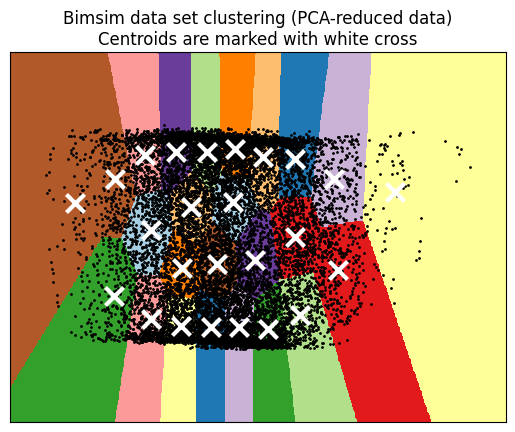

In [102]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)
kmeans = KMeans(init="k-means++", n_clusters=25, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("Bimsim data set clustering (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [103]:
pca.components_

array([[ 0.58221714, -0.49030194, -0.55497877, -0.32383695, -0.08806476],
       [-0.01034758,  0.05037609, -0.02879958,  0.21931683, -0.9738716 ]])